In [5]:
# Importing packages in
from IPython.display import HTML
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import imageio
import pandas as pd
import seaborn
from pysal.explore import esda
from pysal.lib import weights
from splot import esda as esdaplot

In [ ]:
# Overdose fatalities from FLHealthCharts by county
overdose_fatal_fps = {'001' : [8.7, 8.2, 17.3, 17.1],
                 '003' : [0, 4.5, 19.2, 21.7],
                 '005' : [12.5, 24.2, 29.4, 45.2],
                 '007' : [4.5, 15.2, 7.5, 6.7],
                 '009' : [41.4, 50.1, 53.4, 48.2],
                 '011' : [19.5, 22.3, 33.9, 32],
                 '013' : [6.2, 6.5, 0, 4.4],
                 '015' : [10.1, 20.2, 20.6, 35.1],
                 '017' : [24.1, 23.9, 42.9, 43.3],
                 '019' : [22.5, 27.7, 29.9, 28.4],
                 '021' : [17, 25.4, 28.8, 33.5],
                 '023' : [15.7, 10.4, 12.3, 17.8],
                 '086' : [7.4, 9.4, 11.3, 10.7],
                 '027' : [9.2, 5.4, 11.6, 3.1],
                 '029' : [0, 0, 18.4, 24.4],
                 '031' : [27.6, 37.8, 51, 48.2],
                 '033' : [17.7, 22.5, 39.9, 64.6],
                 '035' : [7.7, 28, 49, 25.2],
                 '037' : [0, 0, 20.5, 4.8],
                 '039' : [0, 1.3, 4.7, 3.8],
                 '041' : [0, 19.8, 0, 19.7],
                 '043' : [0, 20.1, 27.4, 45.4],
                 '045' : [7.8, 5.7, 35.1, 0],
                 '047' : [9.9, 0, 13.2, 21.2],
                 '049' : [0, 0, 31.8, 5.3],
                 '051' : [10.1, 14.5, 17.7, 23.9],
                 '053' : [10.6, 20.1, 14.9, 36.1],
                 '055' : [11, 10.9, 33.8, 39.1],
                 '057' : [15.4, 14.7, 27.1, 29.1],
                 '059' : [12.9, 3.1, 8.2, 18.4],
                 '061' : [19.8, 10.4, 18.9, 33],
                 '063' : [4, 6.7, 8, 10.4],
                 '065' : [0, 14.5, 3.7, 10.6],
                 '067' : [0, 0, 0, 0],
                 '069' : [8.5, 19.5, 14.9, 24.2],
                 '071' : [36.6, 32.7, 46.2, 47.8],
                 '073' : [4.6, 6, 7.4, 12.8],
                 '075' : [22.8, 4, 21.3, 30.6],
                 '077' : [0, 0, 0, 0],
                 '079' : [12.2, 0, 8.6, 5.3],
                 '081' : [21.9, 33.6, 37.4, 39.8],
                 '083' : [34.5, 21, 36.6, 40.4],
                 '085' : [27.9, 21.6, 37.8, 17.2],
                 '087' : [13.1, 18.9, 20.3, 32.6],
                 '089' : [16.7, 13.5, 27.2, 19.5],
                 '091' : [24.5, 23.1, 28.8, 31],
                 '093' : [14.6, 19.5, 26.2, 25.6],
                 '095' : [18.7, 20.5, 24.7, 30.2],
                 '097' : [20.1, 15.7, 26.5, 30.2],
                 '099' : [30.9, 36.7, 47.1, 40.2],
                 '101' : [26.9, 32.6, 47.8, 49.6],
                 '103' : [28, 36.8, 48.8, 52.3],
                 '105' : [10.2, 11, 18.1, 18.1],
                 '107' : [15, 10.9, 18.2, 31.6],
                 '109' : [6.3, 8.5, 14.3, 13.7],
                 '111' : [16.4, 17.5, 25.4, 24.7],
                 '113' : [4.4, 9.3, 18, 19],
                 '115' : [16, 23.1, 44.9, 45.5],
                 '117' : [17, 12.4, 11.7, 16.3],
                 '119' : [15.8, 11.5, 16.4, 19.2],
                 '121' : [7, 4.8, 15.1, 5.7],
                 '123' : [0, 9.8, 0, 4.8],
                 '125' : [11.3, 9.3, 7.9, 0],
                 '127' : [32.2, 30.2, 63.2, 64.8],
                 '129' : [2.1, 5, 2.8, 13.3],
                 '131' : [9.2, 6.2, 13.7, 35.2],
                 '133' : [3.9, 14, 0, 16.7]}

In [6]:
# Setting up data
df = pd.DataFrame(overdose_fatal_fps)
dfT = df.transpose()
dfT.columns = ['2018', '2019', '2020', '2021']
df_reset = dfT.reset_index().rename(columns={'index': 'County'})

# Getting shapefile
os.chdir(r"C:\Users\kayni\OneDrive - University of South Florida\Documents\Python Scripts")

filepath = "tl_2016_12_cousub.shp"


gdf = gpd.read_file(filepath)
gdf = gdf.rename(columns={'COUNTYFP': 'County'})
gdf['County'] = gdf['County'].astype('int')

In [7]:
print(df_reset)
# Convert 'county' column in df_reset to int32 instead of a string
df_reset['County'] = df_reset['County'].astype(int)

   County  2018  2019  2020  2021
0     001   8.7   8.2  17.3  17.1
1     003   0.0   4.5  19.2  21.7
2     005  12.5  24.2  29.4  45.2
3     007   4.5  15.2   7.5   6.7
4     009  41.4  50.1  53.4  48.2
..    ...   ...   ...   ...   ...
62    125  11.3   9.3   7.9   0.0
63    127  32.2  30.2  63.2  64.8
64    129   2.1   5.0   2.8  13.3
65    131   9.2   6.2  13.7  35.2
66    133   3.9  14.0   0.0  16.7

[67 rows x 5 columns]


Text(66.97222222222221, 0.5, 'Latitude')

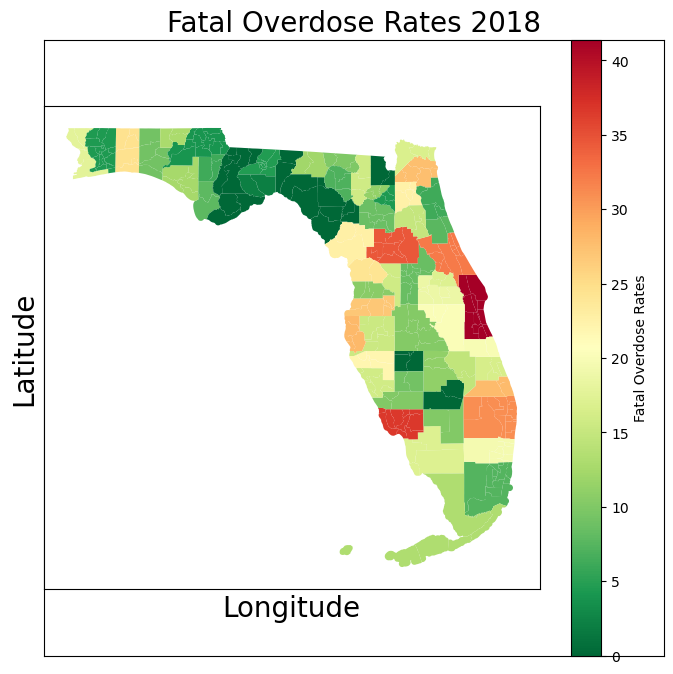

In [54]:
fig = plt.figure(figsize=(8,8))
plt.title('Fatal Overdose Rates 2018', fontsize=20)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(111)


zip_map_2018 = gdf.merge(df_reset, left_on='County', right_on='County')
zip_map_2018.plot(column='2018', ax=ax, cmap='RdYlGn_r', legend=True, legend_kwds={'label': "Fatal Overdose Rates"})
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude',fontsize=20)

Text(66.97222222222221, 0.5, 'Latitude')

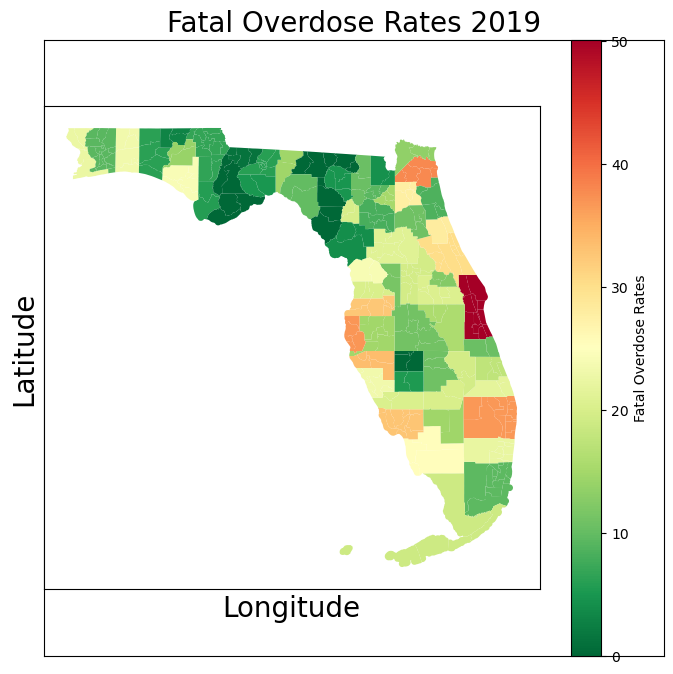

In [53]:
fig = plt.figure(figsize=(8,8))
plt.title('Fatal Overdose Rates 2019', fontsize=20)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(111)


zip_map_2019 = gdf.merge(df_reset, left_on='County', right_on='County')
zip_map_2019.plot(column='2019', ax=ax, cmap='RdYlGn_r', legend=True, legend_kwds={'label': "Fatal Overdose Rates"})
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude',fontsize=20)

Text(66.97222222222221, 0.5, 'Latitude')

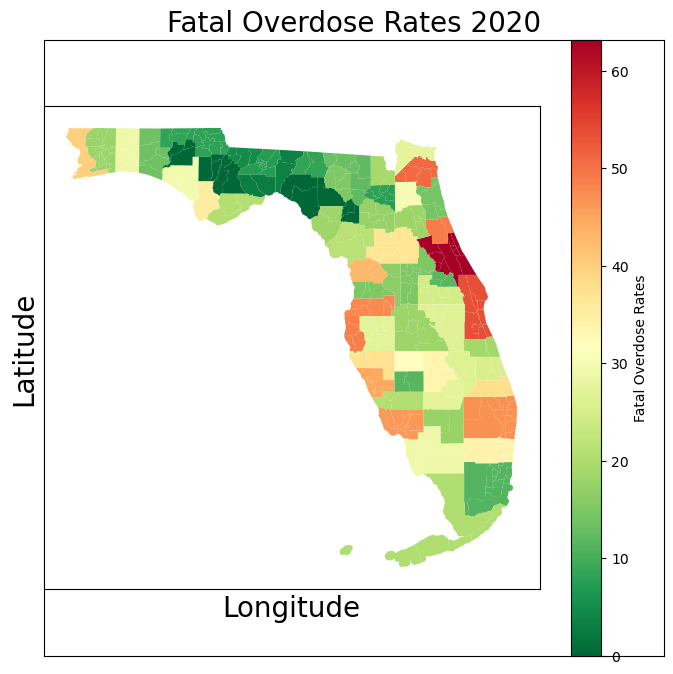

In [45]:
fig = plt.figure(figsize=(8,8))
plt.title('Fatal Overdose Rates 2020', fontsize=20)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(111)


zip_map_2020 = gdf.merge(df_reset, left_on='County', right_on='County')
zip_map_2020.plot(column='2020', ax=ax , cmap='RdYlGn_r', legend=True, legend_kwds={'label': "Fatal Overdose Rates"})
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude',fontsize=20)

Text(66.97222222222221, 0.5, 'Latitude')

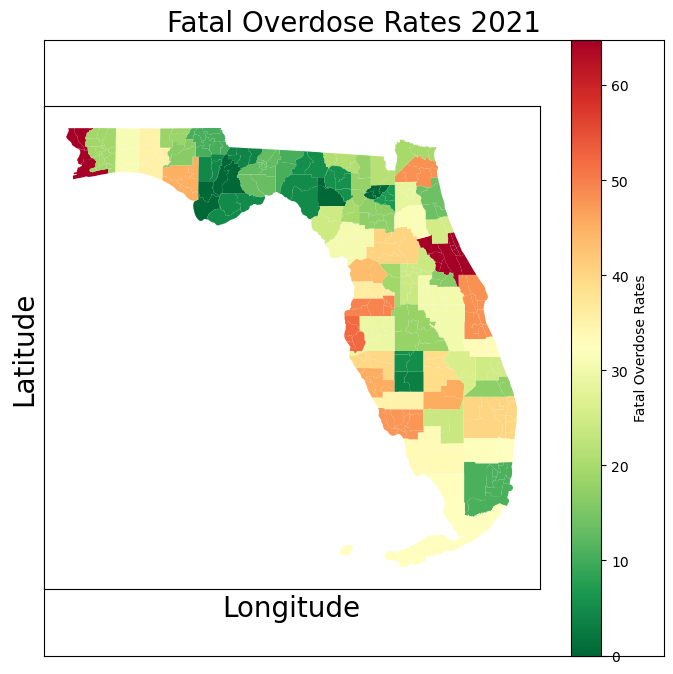

In [8]:
fig = plt.figure(figsize=(8,8))
plt.title('Fatal Overdose Rates 2021', fontsize=20)
plt.xticks([])
plt.yticks([])

ax = fig.add_subplot(111)


zip_map_2021 = gdf.merge(df_reset, left_on='County', right_on='County')
zip_map_2021.plot(column='2021', ax=ax, cmap='RdYlGn_r', legend=True, legend_kwds={'label': "Fatal Overdose Rates"})
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude',fontsize=20)

In [12]:
print(zip_map_2021.columns)

Index(['STATEFP', 'County', 'COUSUBFP', 'COUSUBNS', 'GEOID', 'NAME',
       'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CNECTAFP', 'NECTAFP',
       'NCTADVFP', 'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON',
       'geometry', '2018', '2019', '2020', '2021'],
      dtype='object')


In [79]:
zip_maps = {
    '2018': zip_map_2018,
    '2019': zip_map_2019,
    '2020': zip_map_2020,
    '2021': zip_map_2021
}

# List to store the filenames of the images
filenames = []

# List of years or columns in the GeoDataFrames
years = ['2018', '2019', '2020', '2021']

# Loop through each year, create map plots, and save them as images
for year in years:
    fig, ax = plt.subplots(1, 1)
    
    # Get the GeoDataFrame for the specific year
    zip_map = zip_maps[year]
    
    # Plotting the map for the specific year
    zip_map.plot(column=year, ax=ax, cmap='viridis', legend=True, legend_kwds={'label': f"Year {year}"})
    
    # Save the plot as an image
    filename = f'plot_{year}.png'
    filenames.append(filename)  
    plt.title('Fatal Overdose Rates Florida')
    plt.savefig(filename, dpi=300)  
    plt.close()

In [80]:
# Create a GIF from the saved images using imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))

output_gif = 'maps_animation_4.gif'

# Save the images as an animated GIF
imageio.mimsave(output_gif, images, duration=1000) 

print(f"GIF '{output_gif}' created successfully.")

C:\Users\kayni\AppData\Local\Temp\ipykernel_16500\481394903.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


GIF 'maps_animation_4.gif' created successfully.


In [ ]:
# Determining the k-nearest neighbors

projected_gdf = zip_map_2021.to_crs('EPSG:3395')
# Ensure geometries are polygons (check for validity and type)
projected_gdf = projected_gdf[projected_gdf.geometry.type.isin(['Polygon', 'MultiPolygon'])]
projected_gdf = projected_gdf[projected_gdf.is_valid]

if 'id' not in projected_gdf.columns:
    projected_gdf['id'] = range(len(projected_gdf))

# Spatial join to find neighbors
joined = gpd.sjoin(projected_gdf, projected_gdf, how='inner', op='intersects', lsuffix='left', rsuffix='right')

# Remove self-joins
joined = joined[joined['id_left'] != joined['id_right']]

# Count the neighbors for each polygon
neighbor_counts = joined.groupby('id_left').size()

# Create a Series of the neighbor counts
s = pd.Series(neighbor_counts)

# Plot the histogram of the neighbor counts
s.plot.hist(bins=s.unique().shape[0])

# Find the most common number of neighbors
most_common_neighbors = s.mode().iloc[0]
print(f'The most common number of neighbors is: {most_common_neighbors}')

In [38]:
# Moran's I analysis
# Reproject the geometries to a projected CRS
projected_gdf = zip_map_2021.to_crs('EPSG:3395')

# Calculate centroids of the re-projected geometries
centroids = projected_gdf['geometry'].centroid

# Convert the centroids to a points array
points_array = [(point.x, point.y) for point in centroids]

# Create the KNN weights matrix from the points array
w = weights.distance.KNN(points_array, k=5)

# Row standardization
w.transform = 'R'

In [39]:
zip_map_2021['w_2021'] = weights.lag_spatial(w, zip_map_2021['2021'])
zip_map_2021['2021_std'] = zip_map_2021['2021'] - zip_map_2021['2021'].mean()
zip_map_2021['w_2021_std'] = weights.lag_spatial(w, zip_map_2021['2021_std'])

In [40]:
# Local Moran's I
lisa = esda.moran.Moran_Local(zip_map_2021['2021'], w)

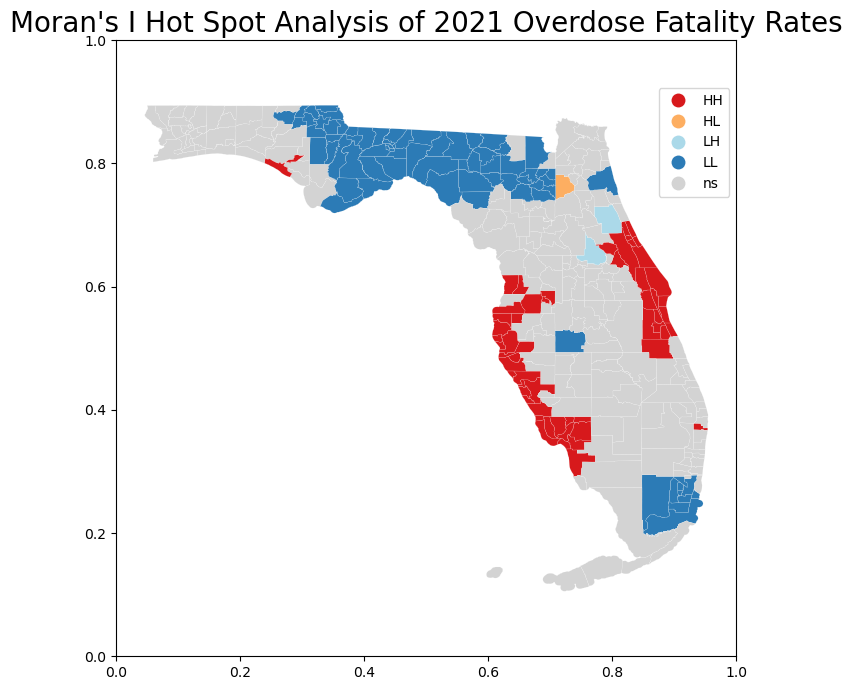

In [43]:
# plotting
figmor = plt.figure(figsize=(8,8))
plt.title("Moran's I Hot Spot Analysis of 2021 Overdose Fatality Rates", fontsize=20)
ax = figmor.add_subplot(111)
esdaplot.lisa_cluster(lisa, zip_map_2021, p=0.05, ax=ax)
plt.show()

In [47]:
# Reproject the geometries to a projected CRS
projected_gdf_2020 = zip_map_2020.to_crs('EPSG:3395')

# Calculate centroids of the re-projected geometries
centroids_2020 = projected_gdf_2020['geometry'].centroid

# Convert the centroids to a points array
points_array_2020 = [(point.x, point.y) for point in centroids_2020]

# Create the KNN weights matrix from the points array
w_2020 = weights.distance.KNN(points_array_2020, k=5)

# Row standardization
w_2020.transform = 'R'

In [48]:
zip_map_2020['w_2020'] = weights.lag_spatial(w, zip_map_2020['2020'])
zip_map_2020['2020_std'] = zip_map_2020['2020'] - zip_map_2020['2020'].mean()
zip_map_2020['w_2020_std'] = weights.lag_spatial(w, zip_map_2020['2020_std'])

In [49]:
# Local Moran's I
lisa_2020 = esda.moran.Moran_Local(zip_map_2020['2020'], w_2020)

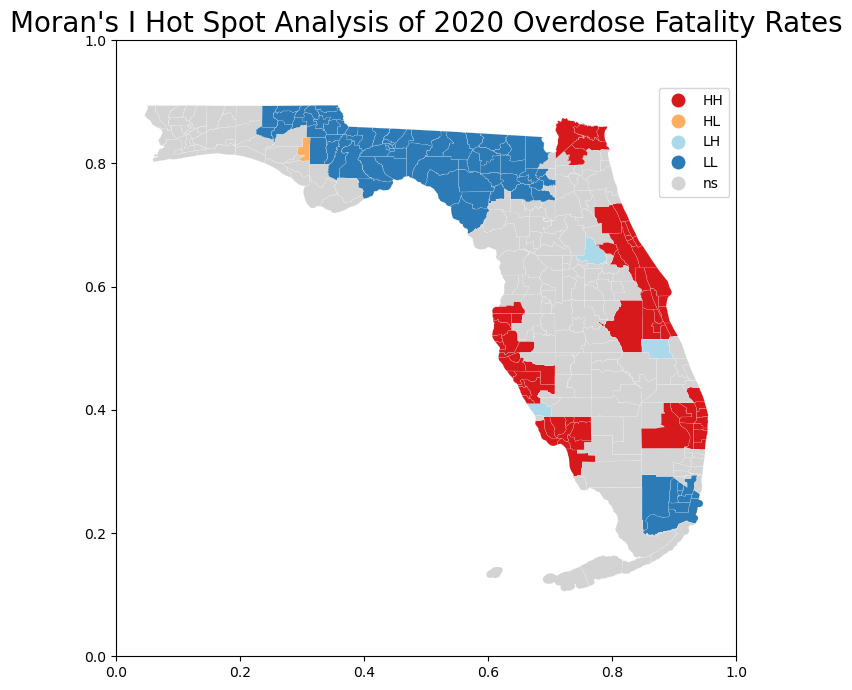

In [51]:
# plotting
figmor_2020 = plt.figure(figsize=(8,8))
plt.title("Moran's I Hot Spot Analysis of 2020 Overdose Fatality Rates", fontsize=20)
ax = figmor_2020.add_subplot(111)
esdaplot.lisa_cluster(lisa_2020, zip_map_2020, p=0.05, ax=ax)
plt.show()

In [55]:
# Reproject the geometries to a projected CRS
projected_gdf_2019 = zip_map_2019.to_crs('EPSG:3395')

# Calculate centroids of the re-projected geometries
centroids_2019 = projected_gdf_2019['geometry'].centroid

# Convert the centroids to a points array
points_array_2019 = [(point.x, point.y) for point in centroids_2019]

# Create the KNN weights matrix from the points array
w_2019 = weights.distance.KNN(points_array_2019, k=5)

# Row standardization
w_2019.transform = 'R'

In [56]:
zip_map_2019['w_2019'] = weights.lag_spatial(w, zip_map_2019['2019'])
zip_map_2019['2019_std'] = zip_map_2019['2019'] - zip_map_2019['2019'].mean()
zip_map_2019['w_2019_std'] = weights.lag_spatial(w, zip_map_2019['2019_std'])

In [57]:
# Local Moran's I
lisa_2019 = esda.moran.Moran_Local(zip_map_2019['2019'], w_2019)

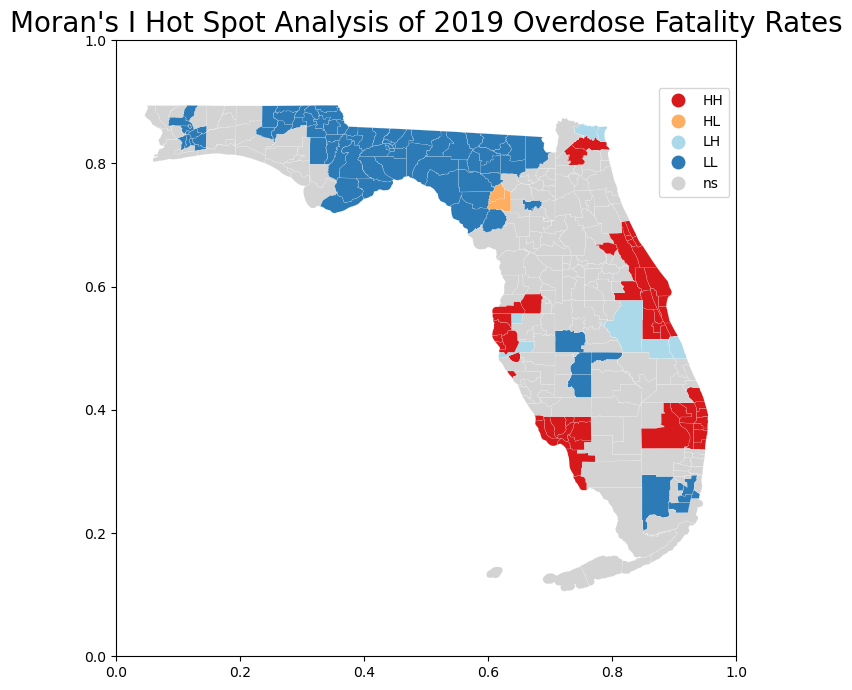

In [58]:
# plotting
figmor_2019 = plt.figure(figsize=(8,8))
plt.title("Moran's I Hot Spot Analysis of 2019 Overdose Fatality Rates", fontsize=20)
ax = figmor_2019.add_subplot(111)
esdaplot.lisa_cluster(lisa_2019, zip_map_2019, p=0.05, ax=ax)
plt.show()

In [59]:
# Reproject the geometries to a projected CRS
projected_gdf_2018 = zip_map_2018.to_crs('EPSG:3395')

# Calculate centroids of the re-projected geometries
centroids_2018 = projected_gdf_2018['geometry'].centroid

# Convert the centroids to a points array
points_array_2018 = [(point.x, point.y) for point in centroids_2018]

# Create the KNN weights matrix from the points array
w_2018 = weights.distance.KNN(points_array_2018, k=5)

# Row standardization
w_2018.transform = 'R'

In [60]:
zip_map_2018['w_2018'] = weights.lag_spatial(w, zip_map_2018['2018'])
zip_map_2018['2018_std'] = zip_map_2018['2018'] - zip_map_2018['2018'].mean()
zip_map_2018['w_2018_std'] = weights.lag_spatial(w, zip_map_2018['2018_std'])

In [61]:
# Local Moran's I
lisa_2018 = esda.moran.Moran_Local(zip_map_2018['2018'], w_2018)

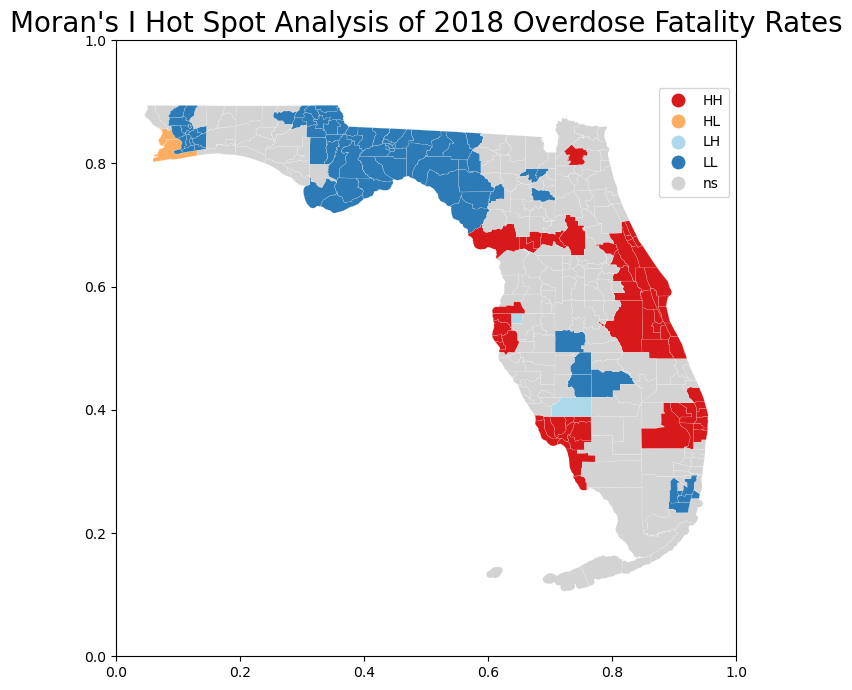

In [62]:
# plotting
figmor_2018 = plt.figure(figsize=(8,8))
plt.title("Moran's I Hot Spot Analysis of 2018 Overdose Fatality Rates", fontsize=20)
ax = figmor_2018.add_subplot(111)
esdaplot.lisa_cluster(lisa_2018, zip_map_2018, p=0.05, ax=ax)
plt.show()

In [67]:
# Plotting and saving each year's map
zip_maps_hotspot = {
    '2018': {'lisa': lisa_2018, 'map': zip_map_2018},
    '2019': {'lisa': lisa_2019, 'map': zip_map_2019},
    '2020': {'lisa': lisa_2020, 'map': zip_map_2020},
    '2021': {'lisa': lisa, 'map': zip_map_2021}
}

# List to store the filenames of the images
filenames = []

# Loop through each year, create map plots, and save them as images
for year, data in zip_maps_hotspot.items():
    fig = plt.figure(figsize=(8, 8))
    plt.title(f"Moran's I Hot Spot Analysis of {year} Overdose Fatality Rates", fontsize=18)
    ax = fig.add_subplot(111)
    esdaplot.lisa_cluster(data['lisa'], data['map'], p=0.05, ax=ax)
    plt.savefig(f'hotspot_map_{year}.png', dpi=300)  # Save the plot as an image with high resolution
    filenames.append(f'hotspot_map_{year}.png')  # Append filename to the list
    plt.close()

In [68]:
# Create a GIF from the saved images using imageio
images = []
for filename in filenames:
    images.append(imageio.imread(filename))

output_gif = 'Morans I Fatal Overdoses.gif'

# Save the images as an animated GIF
imageio.mimsave(output_gif, images, duration=1000)

print(f"GIF '{output_gif}' created successfully.")

C:\Users\kayni\AppData\Local\Temp\ipykernel_70508\2842390863.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


GIF 'Morans I Fatal Overdoses.gif' created successfully.
